<a href="https://colab.research.google.com/github/TahmouresAmirt/Concrete-Crack-Dimension/blob/main/Concrete_Crack_Dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 034-105.jpg to 034-105.jpg
Enter dpi of the image:96
 Image loaded successfully:  



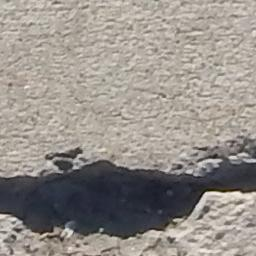


 Image is converted to grayscale: 



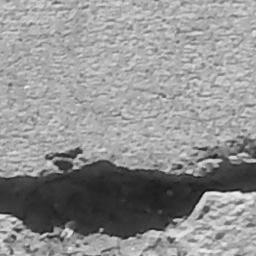


 Blur function is applied to reduce noise and smooth the image:  



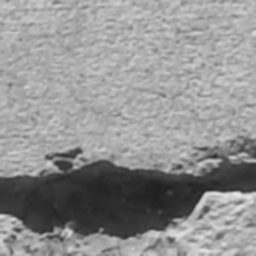


 Canny edge detection algorithm is used to detect edges in the image: 



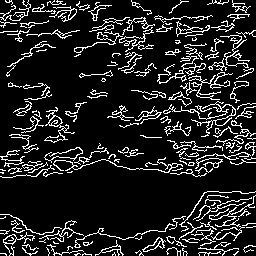


 The Crack is as follows: 



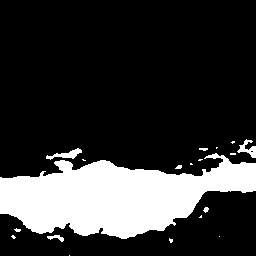


 Number of contours detected: 18 

Total Crack Length: (95.25 mm)
Total Crack Width:  (42.33 mm)

 Original Image with Bounding Boxes: 



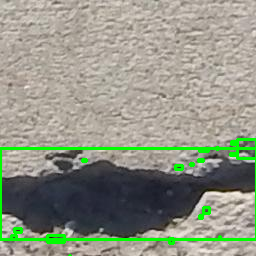

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
DPI = input('Enter dpi of the image:')
DPI = int(DPI)

# Step 2: Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:

    print("\033[1;32;40m Image loaded successfully:  \033[1;31;43m")
    print("")
    cv2_imshow(image)  # Display the original image
    print("")
    # Step 3: Preprocess the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("\033[1;32;40m Image is converted to grayscale: \033[1;31;43m")
    print("")
    cv2_imshow(gray)
    print("")
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    print("\033[1;32;40m Blur function is applied to reduce noise and smooth the image:  \033[1;31;43m")
    print("")
    cv2_imshow(blurred)
    print("")
    edges = cv2.Canny(blurred, 50, 150)
    print("\033[1;32;40m Canny edge detection algorithm is used to detect edges in the image: \033[1;31;43m")
    print("")
    cv2_imshow(edges)
    print("")
    # Step 4: Thresholding
    _, binary = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
    print("\033[1;32;40m The Crack is as follows: \033[1;31;43m")
    print("")
    cv2_imshow(binary)
    print("")
    # Step 5: Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Step 6: Contour detection
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        print("\033[1;32;40m No contours detected. Adjust preprocessing parameters. \033[1;31;43m")
    else:
        print(f"\033[1;32;40m Number of contours detected: {len(contours)} \033[1;31;43m")

        # Step 7: Calculate total crack length and width in pixels
        total_length_px = 0
        total_width_px = 0

        for i, contour in enumerate(contours):
            # Calculate the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)

            # Accumulate the length and width of the crack
            total_length_px += max(w, h)
            total_width_px += min(w, h)

            # Draw the bounding box on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Step 8: Convert pixels to millimeters
        # You need to know the scale factor (pixels per millimeter)
        # Example: If 100 pixels = 1 mm, then scale_factor = 100

        scale_factor = 25.4/DPI  # Replace this with the actual scale factor for your image
        total_length_mm = total_length_px * scale_factor
        total_width_mm = total_width_px * scale_factor

        # Step 9: Output the results
        print("")
        print(f"Total Crack Length: ({total_length_mm:.2f} mm)")
        print(f"Total Crack Width:  ({total_width_mm:.2f} mm)")
        print("")
        # Display the results
        print("\033[1;32;40m Original Image with Bounding Boxes: \033[1;31;43m")
        print("")
        cv2_imshow(image)